<a href="https://colab.research.google.com/github/GeraDLC/Credit_Score_Prediction/blob/main/CreditScoreProject_Team_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
#biblioteca para padronizar los datos (estandarizar/normalizar datos)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import joblib
global df_banco, resultados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2. Preprocesamiento de Datos**


---


In [3]:
df_banco = pd.read_csv('/content/drive/MyDrive/german_credit.csv')
df_banco

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [4]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [5]:
#Diccionarios para variables categóricas.
a = { '< 0 DM' : 1, '0 <= ... < 200 DM' : 2, '>= 200 DM / salary assignments for at least 1 year' : 3, 'no checking account' : 4}

b = {'no credits taken/ all credits paid back duly' : 1, 'all credits at this bank paid back duly' : 2,
     'existing credits paid back duly till now' : 3,
     'delay in paying off in the past' : 4, 'critical account/ other credits existing (not at this bank)' : 5}

c = {'car (new)':1, 'car (used)' : 2, 'furniture/equipment': 3, 'radio/television' : 4, 'domestic appliances' : 5, 'repairs' : 6,
     'education' : 7, '(vacation - does not exist?)' : 8, 'retraining' : 9, 'business' : 10, 'others' : 11}

d = {'... < 100 DM' : 5, '100 <= ... < 500 DM' : 4, '500 <= ... < 1000 DM ' : 3, '.. >= 1000 DM ' : 2,
    'unknown/ no savings account' : 1}

e = {'unemployed' : 5, '... < 1 year ' : 4, '1 <= ... < 4 years' : 3, '4 <= ... < 7 years' : 2, '.. >= 7 years' : 1}

f = {'male : divorced/separated' : 1, 'female : divorced/separated/married' : 2, 'male : single' : 3,
     'male : married/widowed' : 4, 'female : single' : 5}

g = {'none' : 1, 'co-applicant' : 2, 'guarantor' : 3}

h = {'real estate' : 1, 'if not A121 : building society savings agreement/ life insurance' : 2,
     'if not A121/A122 : car or other, not in attribute 6' : 3, 'unknown / no property' : 4}

i = {'bank' : 1, 'stores' : 2, 'none' : 3}

j = {'rent' : 1, 'own' : 2, 'for free' : 3}

k = {'unemployed/ unskilled - non-resident' : 1, 'unskilled - resident' : 2, 'skilled employee / official' : 3,
	    'management/ self-employed/ highly qualified employee/ officer' : 4}

l = {'none' : 0, 'yes, registered under the customers name ' : 1}

m = {'yes' : 1, 'no' : 0}

#lista_dict = [a,b,c,d,e,f,g,h,i,j,k,l,m]

In [6]:
#Función procesar_datos()
def procesar_datos():
    #Variable global
    global df_banco

    # Eliminar duplicados
    df_banco = df_banco.drop_duplicates()

    # Tratamiento de nulos (en este caso no hay nulos)
    df_banco = df_banco.dropna()

    #Cambio de variables categóricas a numéricas
    df_banco['account_check_status'] = df_banco['account_check_status'].map(a)
    df_banco['credit_history'] = df_banco['credit_history'].map(b)
    df_banco['purpose'] = df_banco['purpose'].map(c)
    df_banco['savings'] = df_banco['savings'].map(d)
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(e)
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(f)
    df_banco['other_debtors'] = df_banco['other_debtors'].map(g)
    df_banco['property'] = df_banco['property'].map(h)
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(i)
    df_banco['housing'] = df_banco['housing'].map(j)
    df_banco['job'] = df_banco['job'].map(k)
    df_banco['telephone'] = df_banco['telephone'].map(l)
    df_banco['foreign_worker'] = df_banco['foreign_worker'].map(m)

In [7]:
procesar_datos()
df_banco

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,12,3,4,1736,5,2,3,2,1,4,1,31,3,2,1,2,1,0,1
996,0,1,30,3,2,3857,5,3,4,1,1,4,2,40,3,2,1,4,1,1,1
997,0,4,12,3,5,804,5,1,4,3,1,4,3,38,3,2,1,3,1,0,1
998,1,1,45,3,5,1845,5,3,4,3,1,4,4,23,3,3,1,3,1,1,1


In [8]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

#**3. Exploración de Datos**


---


In [9]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,3,67,6,1169,0
1,2,22,48,5951,1
2,3,49,12,2096,0
3,3,45,42,7882,0
4,3,53,24,4870,1


In [10]:
df_banco['personal_status_sex'].unique()

array([3, 2, 1, 4])

f = {'male : divorced/separated' : 1, 'female : divorced/separated/married' : 2, 'male : single' : 3,
     'male : married/widowed' : 4, 'female : single' : 5}

In [11]:
#Diccionarios para la función feature_engineering
sexo_mapping = {1 : 0, 2 : 1, 3 : 0, 4 : 0, 5:1}

estado_civil_mapping = {3 : 1, 5 : 1, 1 : 0, 2:0, 4:0}

In [12]:
#Función feature_engineering()
def feature_engineering():
    #Variable global
    global df_banco

    # Crear la variable sexo
    df_banco['sexo'] = df_banco['personal_status_sex'].map(sexo_mapping)

    # Crear la variable estado_civil
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(estado_civil_mapping)

    #Crear la variable rango_edad
    df_banco['rango_edad'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])

    #Creando la variable rango_plazos_credito
    df_banco['rango_plazos_credito'] = pd.cut(x = df_banco['duration_in_month'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])

    #Creando la variable rango_valor_credito (verificar por que no funcionó la comprensión de listas)
    df_banco['rango_valor_credito'] = pd.cut(x = df_banco['credit_amount'],
                                             bins = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,
                                                     14000,15000,16000,17000,18000,19000,20000],
                                             labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

    #Borrar columnas menos la ultima (default)
    df_banco.drop(variables_discretas[:-1], axis = 1, inplace = True)

In [13]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [14]:
#Función analisis_exploratorio()
def analisis_exploratorio():
    global df_banco

    #Lista de columnas a graficar
    columnas = ['sexo', 'estado_civil','rango_plazos_credito','rango_edad', 'rango_valor_credito', 'default']

    #Configurar el tamaño de la figura
    plt.figure(figsize=(12, 10))

    #Graficar para cada columna en la lista
    num_columnas_por_fila = 2
    num_filas = len(columnas) // num_columnas_por_fila + len(columnas) % num_columnas_por_fila

    for i, columna in enumerate(columnas, 1):
        plt.subplot(num_filas, num_columnas_por_fila, i)
        sns.countplot(x=columna, data=df_banco)
        plt.ylabel('total')

    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

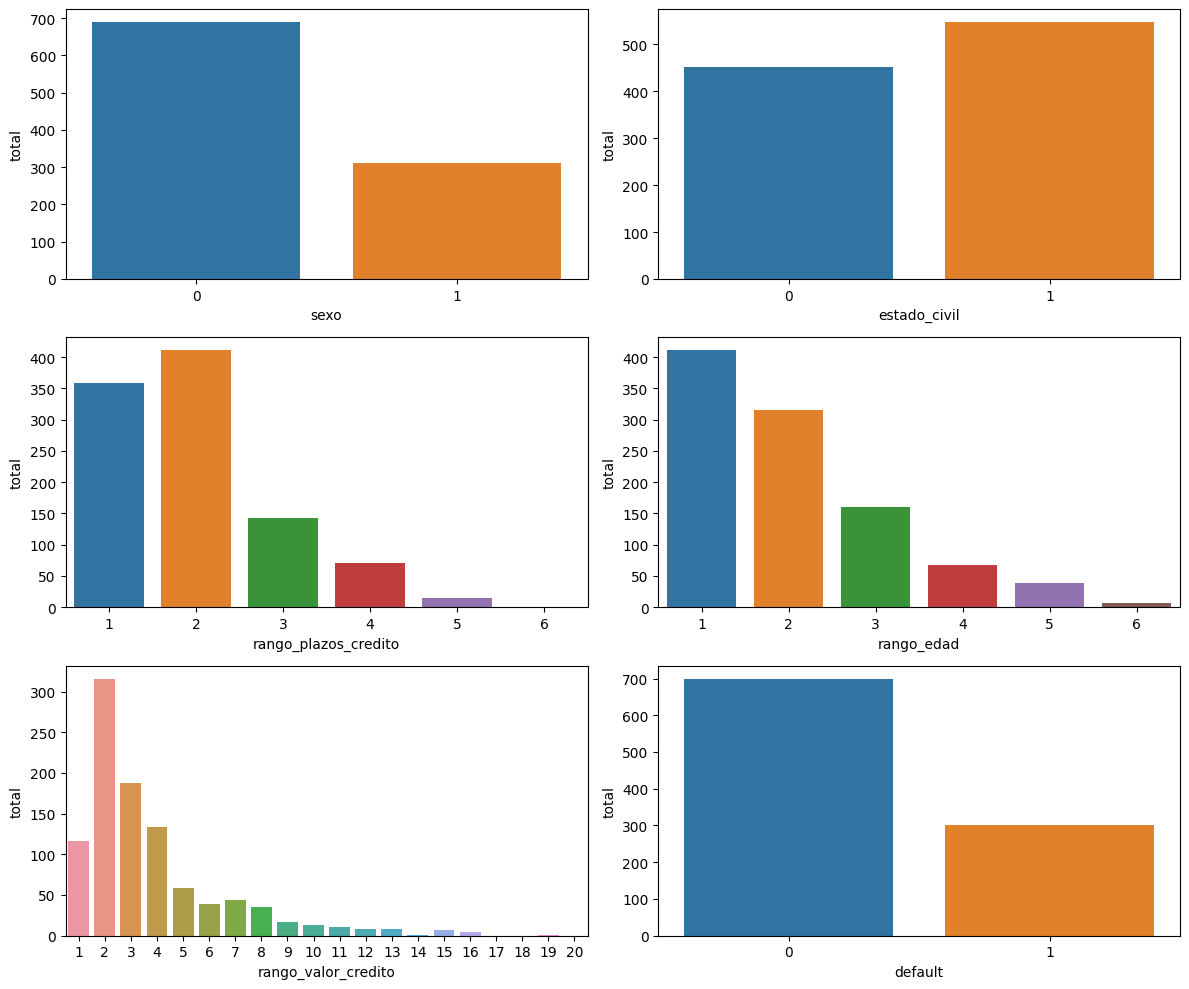

In [15]:
analisis_exploratorio()

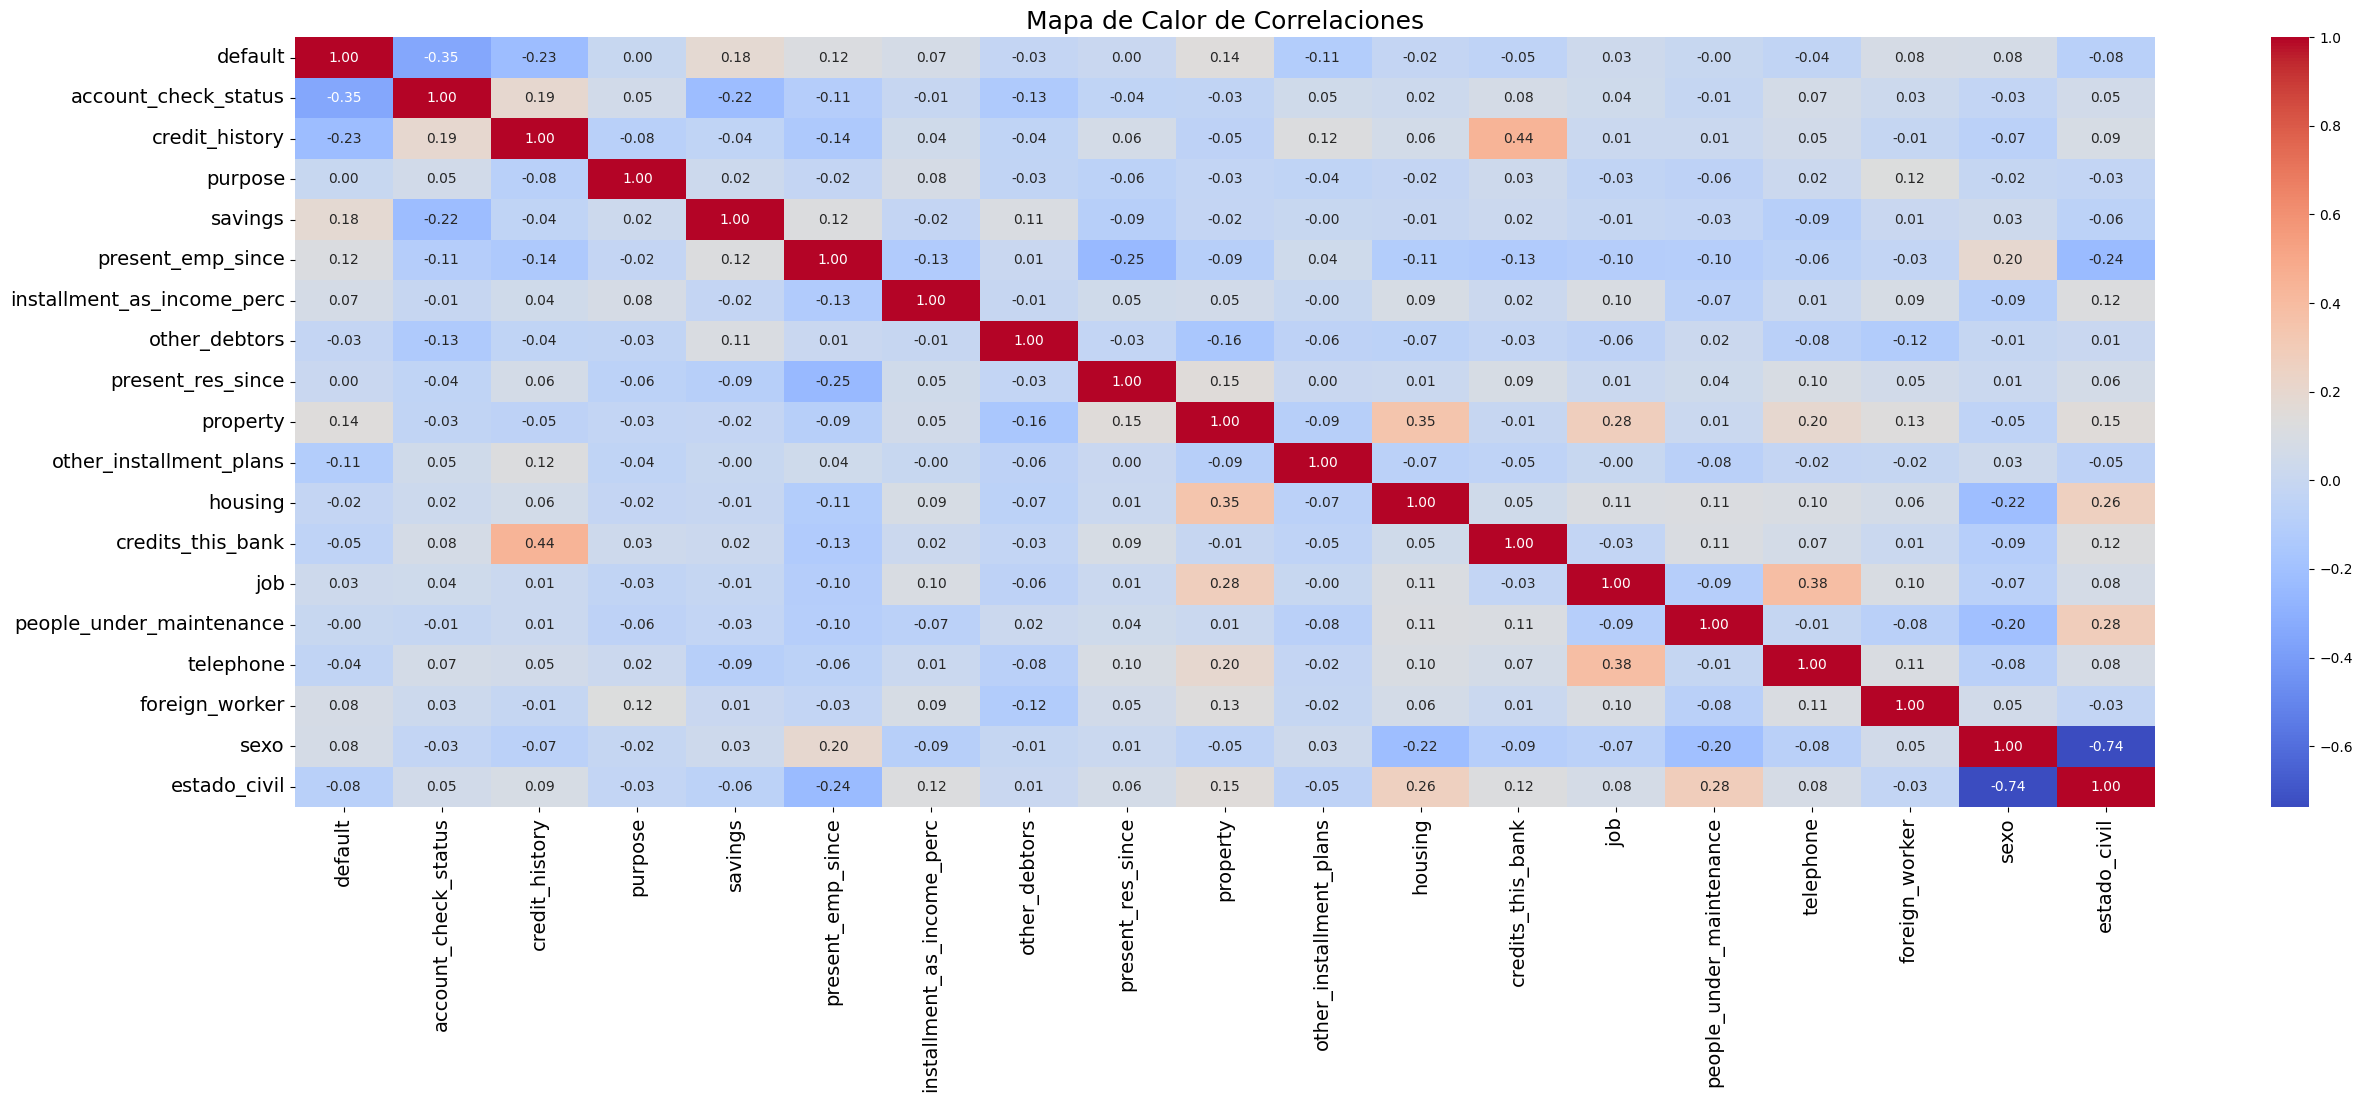

In [16]:
#Mapa de calor
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

<Axes: >

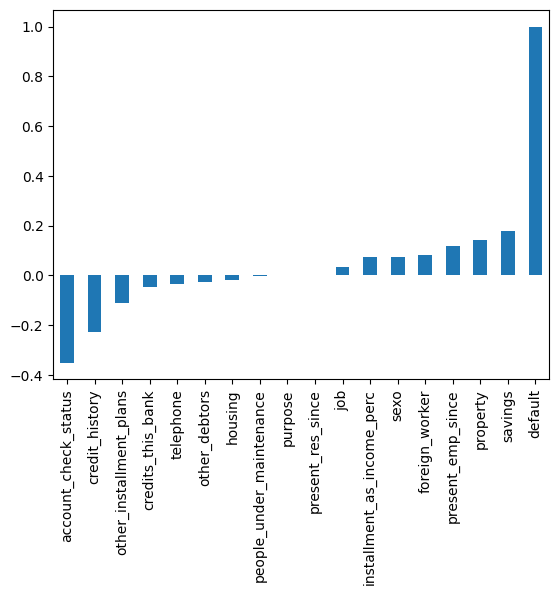

In [17]:
#Correlación de las variables respecto a 'default'
df_banco.corr()['default'][:-1].sort_values().plot(kind='bar')

Las variables que menos relación tienen con 'default' son 'present_res_since', 'purpose', 'people_under_maintenance' y posiblemente 'housing'.

In [18]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       142
              1       310
1             0       548
dtype: int64



Observa y analiza la distribución de cada uno ellos, realiza algunas preguntas para tus datos:
¿Existe algún grupo o categoría que no tenga suficiente información?
¿Puedo obtener más información o puedo descartar alguna categoría?
Genera un gráfico de correlación sobre tus datos y analízalo:
¿Existe algún atributo que ya está siendo explicado por otro atributo?
¿Cuál de estos debería usar y cuál descartar?

In [19]:
#Se desechan estas variables debido a feature_importance del mejor modelo, a continuación se verá que fue Random Forest
variables_desechables = ['credits_this_bank', 'people_under_maintenance', 'foreign_worker', 'sexo', 'telephone']
df_banco.drop(variables_desechables, axis = 1, inplace = True)

In [20]:
df_banco

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,job,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,3,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,3,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,2,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,3,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,3,1,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,4,5,2,3,1,4,1,3,2,2,0,2,1,2
996,0,1,3,2,5,3,4,1,4,2,3,2,4,0,2,3,4
997,0,4,3,5,5,1,4,1,4,3,3,2,3,1,2,1,1
998,1,1,3,5,5,3,4,1,4,4,3,3,3,1,1,4,2


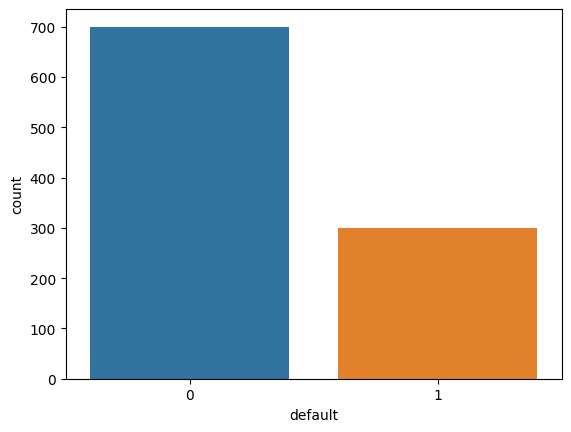

In [21]:
#variable default está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='default', data=df_banco)

In [22]:
df_banco.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [23]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

#dividiendo los datos en características y target
X = df_banco.drop('default', axis = 1)
y = df_banco['default']

smt = SMOTE(random_state=77)
X, y = smt.fit_resample(X, y) #Esta función genera nuevas muestras sintéticas para la clase menor

#unión de los datos balanceados
df_banco = pd.concat([X, y], axis=1)

#verificación 1 - unión de los datos
df_banco

,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,job,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,default
0,1,5,5,1,1,4,1,4,1,3,2,3,1,5,1,2,0
1,2,3,5,5,3,2,1,2,1,3,2,3,0,1,4,6,1
2,4,5,8,5,2,2,1,3,1,3,2,2,1,3,1,3,0
3,1,3,4,5,2,2,3,4,2,3,3,3,1,3,4,8,0
4,1,4,1,5,3,3,1,4,4,3,3,3,1,4,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2,5,5,1,2,3,1,3,4,3,3,3,1,2,1,2,1
1396,1,1,9,5,4,2,1,3,4,3,1,2,0,3,4,15,1
1397,2,3,1,5,4,3,1,4,3,3,2,2,0,1,2,2,1
1398,1,3,1,5,1,4,1,4,4,1,3,3,0,3,4,7,1


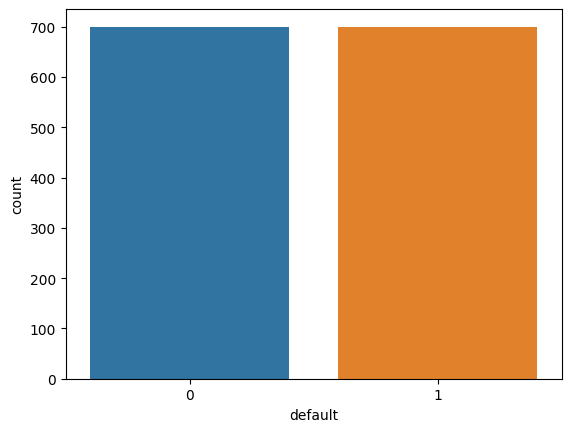

In [24]:
#verificación 2 - balanceamiento
ax = sns.countplot(x='default', data=df_banco)

 Category of customer
         0 : Good customer
	       1 : Bad customer

Queremos predecir quien será un buen y mal cliente.

<Axes: >

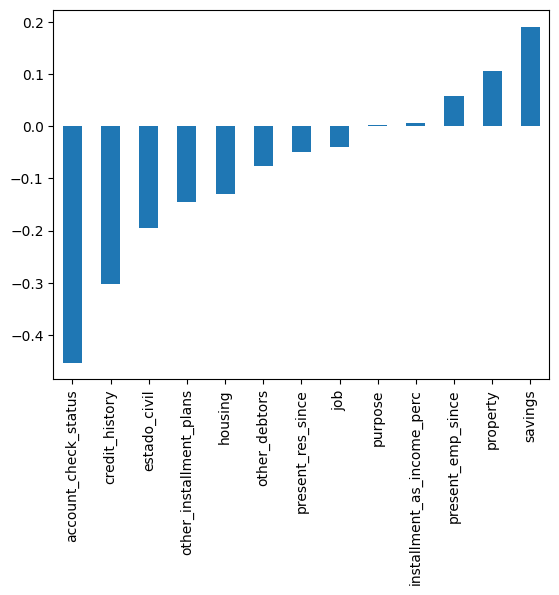

In [25]:
#Correlación de las variables con el default
df_banco.corr()['default'][:-1].sort_values().plot(kind='bar')

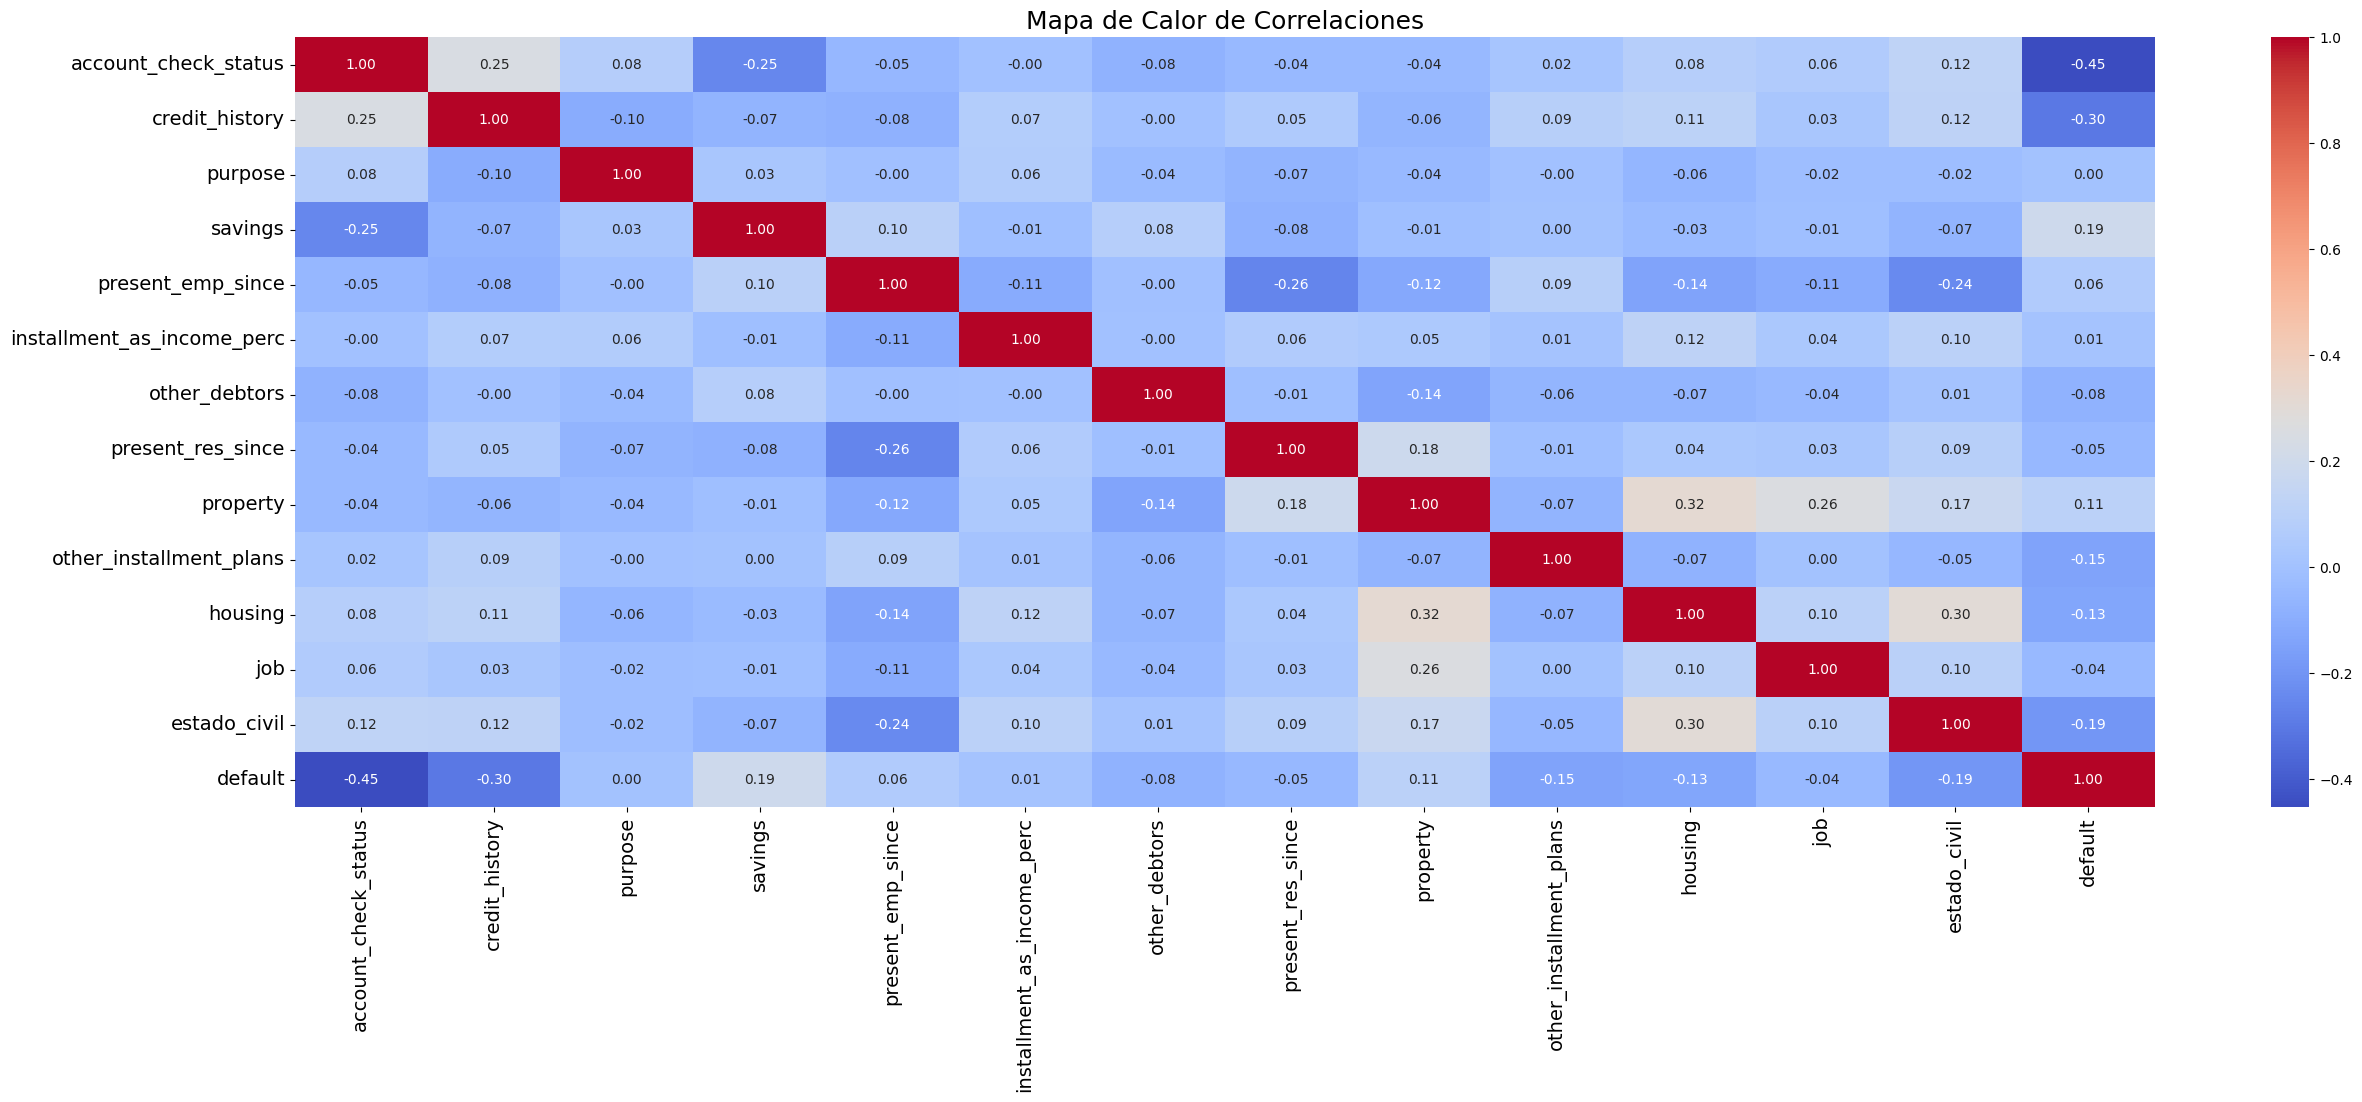

In [26]:
#Mapa de calor nuevo
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

#**4. Construcción de Modelos**


---


In [27]:
#Función crea_modelos()
def crea_modelos():
    global df_banco, resultados

    #Listas para almanecar los valores
    nombre_modelo = []
    accuracy = []
    precision = []
    rc = []
    f1 = []
    auc_roc = []
    matriz_confusion = []
    feature_importances = []
    modelos_entrenados = []

    #Separar datos en entrenamiento y prueba
    X = df_banco.drop(columns='default')
    feature_names = X.columns.tolist()  # Obtener nombres de características (columnas)
    y = df_banco['default']

    #Normalizar datos
    norm = StandardScaler()
    X_normalizado = norm.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=77)

    modelos = [
        ('Regresión Logística', LogisticRegression(solver = 'liblinear')),
        ('Árbol de Decisión', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC())]

    for nombre, model in modelos:

        #Entrenando modelo
        model.fit(X_train, y_train)

        #Predicciones
        predictions = model.predict(X_test)

        #Métricas de evaluación
        acc = accuracy_score(y_test, predictions)
        prec = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1_value = f1_score(y_test, predictions)
        auc_roc_value = roc_auc_score(y_test,predictions)
        matriz = confusion_matrix(y_test, predictions)

        # Obtener feature_importances_ y nombres de características
        if hasattr(model, 'feature_importances_'):
            feature_importances.append(dict(zip(feature_names, model.feature_importances_)))
        else:
            feature_importances.append(None)

        #Almacenar valores en listas
        modelos_entrenados.append(model)
        nombre_modelo.append(nombre)
        accuracy.append(acc)
        precision.append(prec)
        rc.append(recall)
        f1.append(f1_value)
        auc_roc.append(auc_roc_value)
        matriz_confusion.append(matriz)

    # Guardar la lista de modelos
    joblib.dump(modelos_entrenados, "modelos_entrenados.joblib")

    #Resultados
    resultados = {
    'Nombre_Modelo': nombre_modelo,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': rc,
    'F1_Score': f1,
    'AUC_ROC': auc_roc,
    'Matriz_Confusión' : matriz_confusion,
    'Feature_Importances': feature_importances}

In [28]:
crea_modelos()

In [29]:
for i, model in enumerate(resultados['Nombre_Modelo']):

    print(f"Modelo: {model}")
    print(f"Accuracy: {round(resultados['Accuracy'][i], 3)}")
    print(f"Precisión: {round(resultados['Precision'][i], 3)}")
    print(f"Recall: {round(resultados['Recall'][i], 3)}")
    print(f"F1_Score: {round(resultados['F1_Score'][i], 3)}")
    print(f"AUC-ROC: {round(resultados['AUC_ROC'][i], 3)}")
    print(f"Features importances: {resultados['Feature_Importances'][i]}\n")

Modelo: Regresión Logística
Accuracy: 0.757
Precisión: 0.741
Recall: 0.763
F1_Score: 0.752
AUC-ROC: 0.757
Features importances: None

Modelo: Árbol de Decisión
Accuracy: 0.789
Precisión: 0.75
Recall: 0.844
F1_Score: 0.794
AUC-ROC: 0.791
Features importances: {'account_check_status': 0.20447268338994318, 'credit_history': 0.06039096870695493, 'purpose': 0.07965114243737537, 'savings': 0.060440439026252665, 'present_emp_since': 0.06028928389149051, 'installment_as_income_perc': 0.03594979338555386, 'other_debtors': 0.04036329157951723, 'present_res_since': 0.05216200158627454, 'property': 0.031829082959621474, 'other_installment_plans': 0.04581871024493658, 'housing': 0.02829857490509486, 'job': 0.04240581891624625, 'estado_civil': 0.027406236308835243, 'rango_edad': 0.06800456073874758, 'rango_plazos_credito': 0.07437604703730331, 'rango_valor_credito': 0.08814136488585235}

Modelo: Random Forest
Accuracy: 0.846
Precisión: 0.807
Recall: 0.896
F1_Score: 0.849
AUC-ROC: 0.848
Features impo

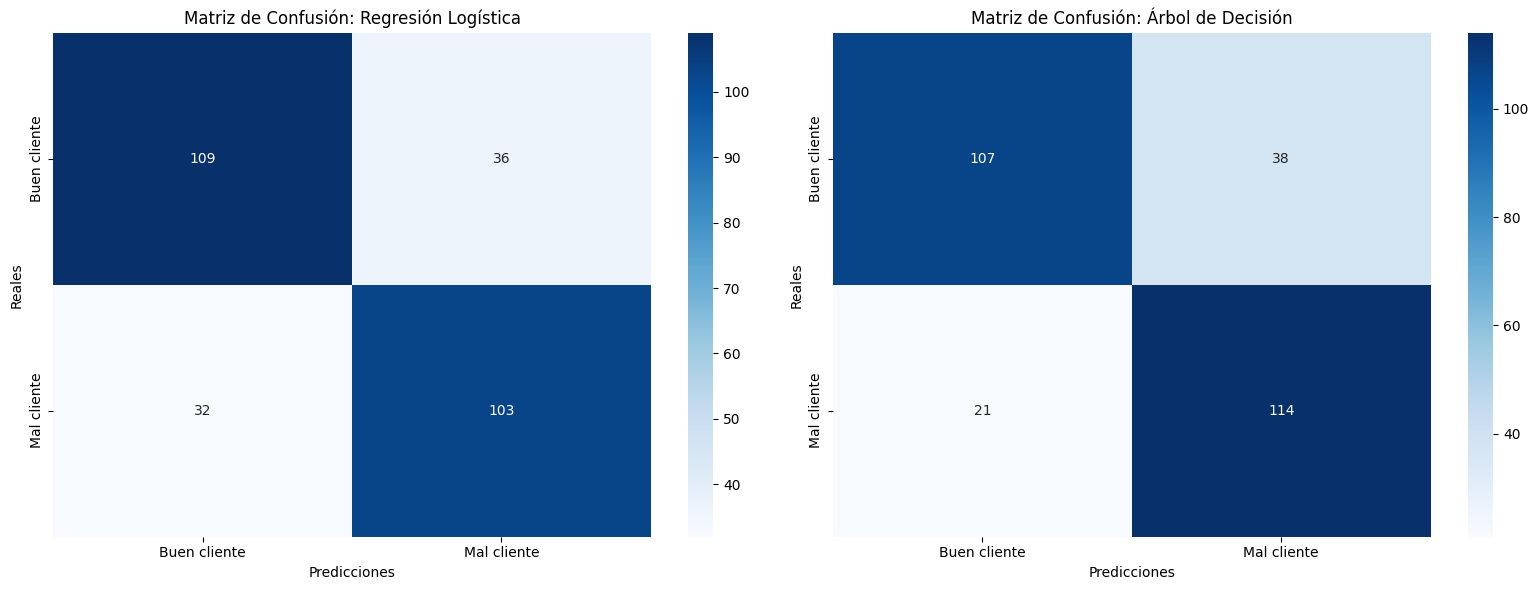

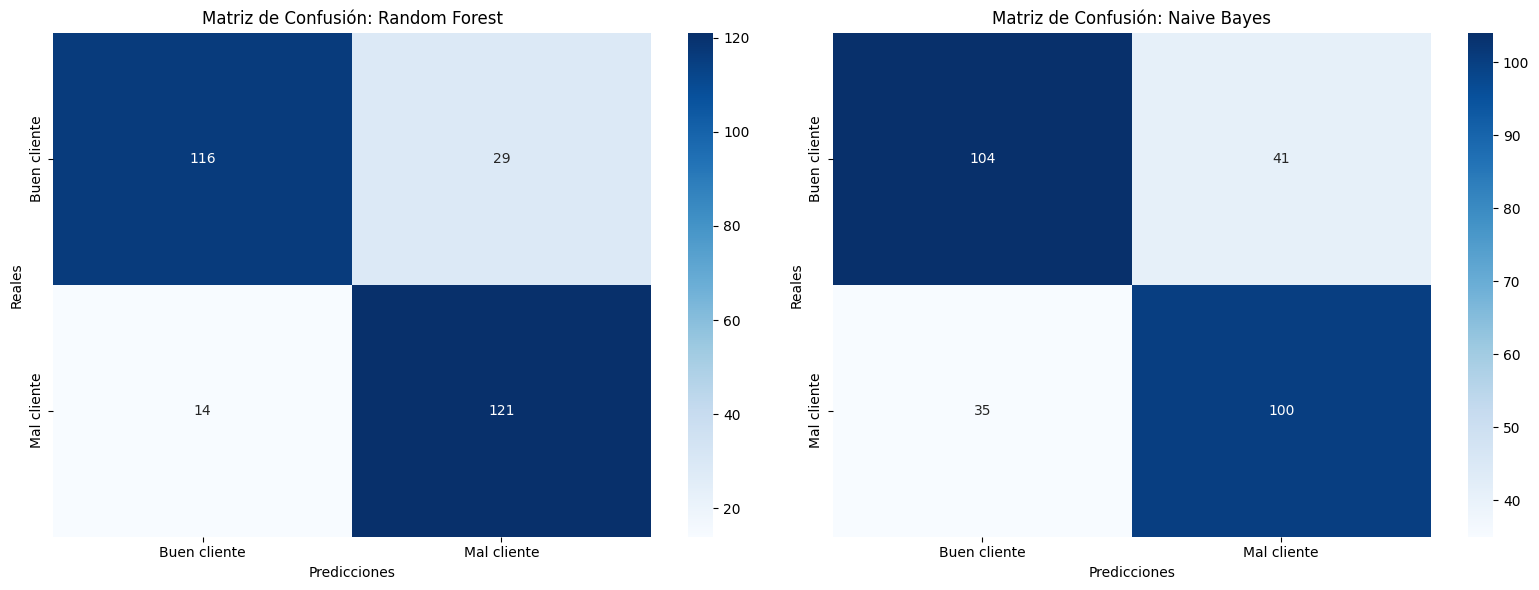

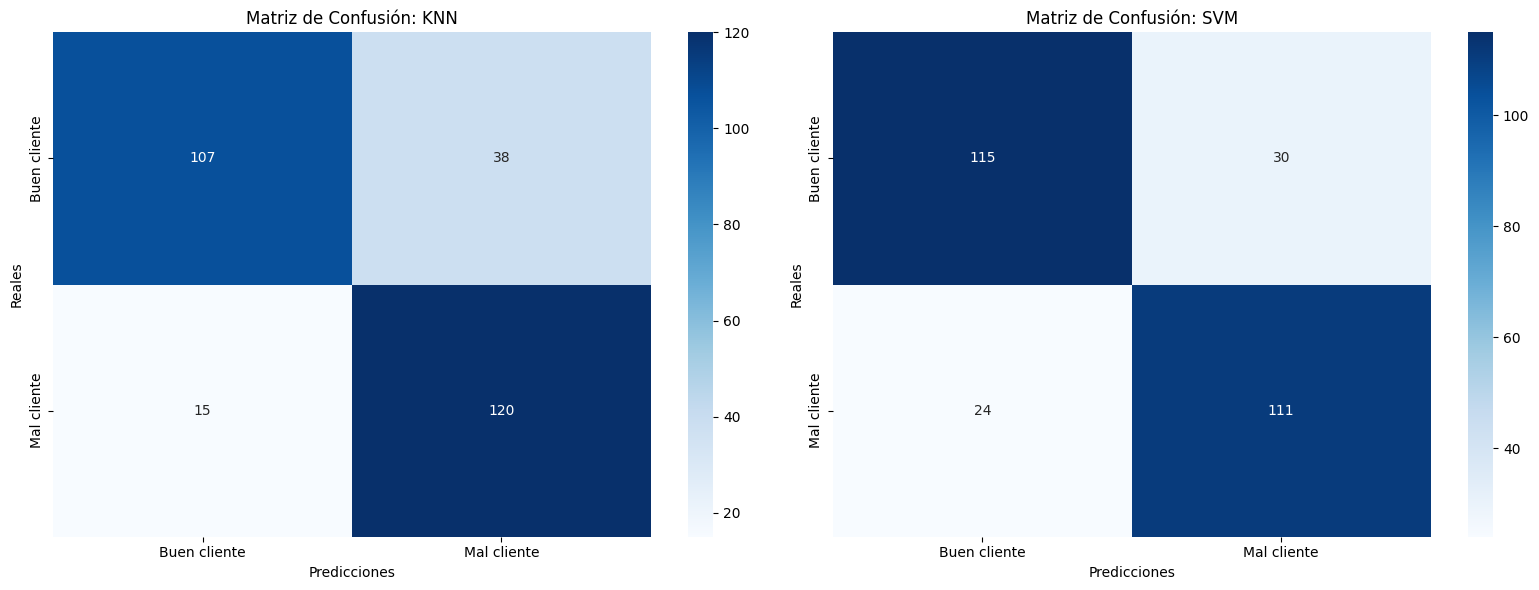

In [30]:
#Matrices de confusión para cada modelo
for i in range(0, len(resultados['Nombre_Modelo']), 2):
    plt.figure(figsize=(16, 6))

    for j in range(2):
        if i + j < len(resultados['Nombre_Modelo']):
            plt.subplot(1, 2, j + 1)
            sns.heatmap(resultados['Matriz_Confusión'][i + j], annot=True, fmt="d", cmap="Blues", xticklabels=["Buen cliente", "Mal cliente"], yticklabels=["Buen cliente", "Mal cliente"])
            plt.title(f"Matriz de Confusión: {resultados['Nombre_Modelo'][i + j]}")
            plt.xlabel("Predicciones")
            plt.ylabel("Reales")

    plt.tight_layout()
    plt.show()


#**5. Evaluación y Selección del Modelo**


---


In [31]:
#Visualiza_resultados()
def visualiza_resultados():
    global df_banco, resultados

    #Transformar resultados a df
    results_df = pd.DataFrame(resultados)

    # Excluir las últimas dos columnas (matriz de confusión y feature_importances)
    results_df = results_df.iloc[:, :-2]
    results_df.set_index('Nombre_Modelo', inplace=True)

    #Transponer df y graficar
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

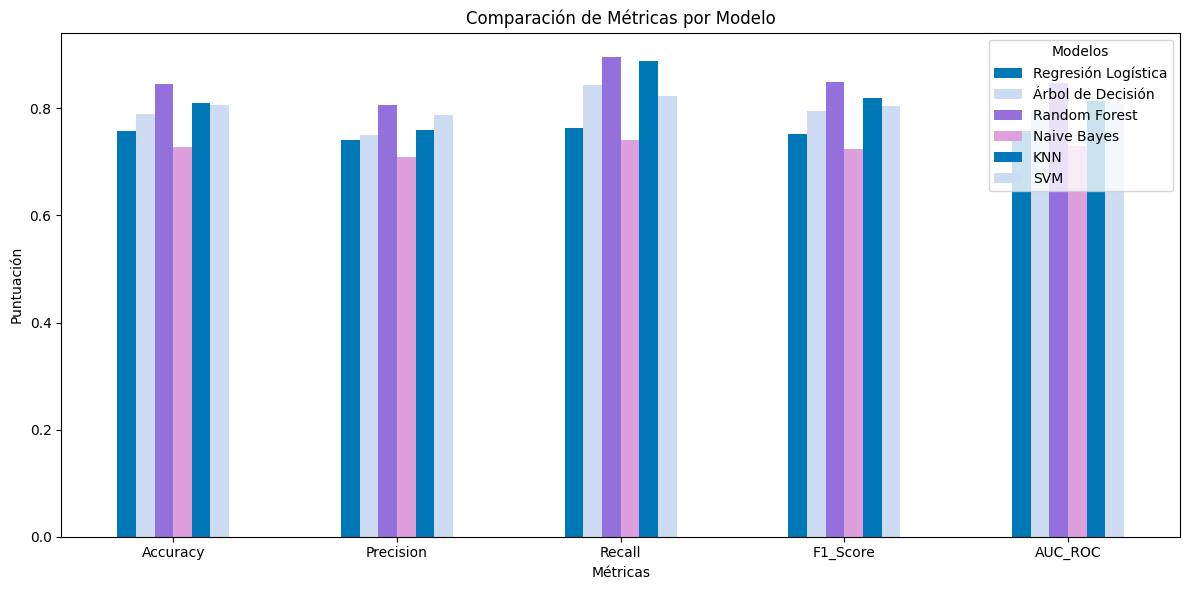

In [32]:
visualiza_resultados()

## En este proyecto de machine learning el modelo con las mejores métricas fue Random Forest Classifier, obteniendo un Accuracy: 0.846 y Precisión: 0.807. El cual lo hace el modelo con mejores métricas para este proyecto de clasificación de potenciales buenos y malos clientes. Como se observa en la amtriz de confusión es el modelo que menos se equivoca en general al clasificar clientes.

#**6. Carga y Prueba del Modelo**


---

Experimentemos con dos datos aleatorios.

In [33]:
# Cargar la lista de modelos
modelos_entrenados = joblib.load("modelos_entrenados.joblib")

# Acceder al modelo Random Forest
RFC = modelos_entrenados[2]

#Diccionario de nuevos datos
nuevos_datos = {
    'account_check_status': 1,
    'credit_history': 2,
    'purpose': 3,
    'savings': 4,
    'present_emp_since': 5,
    'installment_as_income_perc': 4,
    'other_debtors': 1,
    'present_res_since': 4,
    'property': 2,
    'other_installment_plans': 1,
    'housing': 3,
    'job': 2,
    'estado_civil': 0,
    'rango_edad': 3,
    'rango_plazos_credito': 2,
    'rango_valor_credito': 10}

# Convertir el nuevo registro a un DataFrame
df_prediccion = pd.DataFrame([nuevos_datos])

#Predecir
predicciones = RFC.predict(df_prediccion)

# Imprimir la predicción
if predicciones == 0:
    print("\n\nEl nuevo cliente es un buen cliente")
elif predicciones == 1:
    print("\n\nEl nuevo cliente es un mal cliente\n")



El nuevo cliente es un buen cliente
